In [1]:

from keras.models import load_model

Using TensorFlow backend.


In [2]:
model=load_model('model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras import layers
from keras import models

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [5]:
from keras.applications import VGG16


In [6]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [7]:
conv_base.summary

<bound method Network.summary of <keras.engine.training.Model object at 0x0000021A048B6898>>

In [8]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [9]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
from keras.models import load_model

In [11]:
model=load_model('pneumonia.h5')

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
model.trainable=True

In [14]:
set_trainable=False

In [15]:
for layer in model.layers:
    if layer.name=='conv2d_8':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [16]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

In [17]:
import os

In [18]:
base_dir='C:\chest_xray'
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')
test_dir=os.path.join(base_dir,'test')

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                 batch_size=20, class_mode='binary')


validation_generator=test_datagen.flow_from_directory(val_dir,
                                                      target_size=(150,150),
                                                      batch_size=20,
                                                      class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 956 images belonging to 2 classes.


In [20]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 43s 428ms/step - loss: 0.0904 - acc: 0.9665 - val_loss: 0.1268 - val_acc: 0.9508
Epoch 2/100
100/100 [==============================] - 46s 464ms/step - loss: 0.0751 - acc: 0.9705 - val_loss: 0.1254 - val_acc: 0.9498
Epoch 3/100
100/100 [==============================] - 45s 453ms/step - loss: 0.0763 - acc: 0.9720 - val_loss: 0.1279 - val_acc: 0.9508
Epoch 4/100
100/100 [==============================] - 50s 499ms/step - loss: 0.0786 - acc: 0.9715 - val_loss: 0.1136 - val_acc: 0.9528
Epoch 5/100
100/100 [==============================] - 44s 436ms/step - loss: 0.0762 - acc: 0.9730 - val_loss: 0.1359 - val_acc: 0.9468
Epoch 6/100
100/100 [==============================] - 51s 513ms/step - loss: 0.0746 - acc: 0.9715 - val_loss: 0.0993 - val_acc: 0.9568
Epoch 7/100
100/100 [==============================] - 46s 461ms/step - loss: 0.0777 - acc: 0.9730 - val_loss: 0.1306 - val_acc: 0.9448
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 49s 491ms/step - loss: 0.0505 - acc: 0.9805 - val_loss: 0.1093 - val_acc: 0.9659
Epoch 62/100
100/100 [==============================] - 43s 431ms/step - loss: 0.0537 - acc: 0.9820 - val_loss: 0.0997 - val_acc: 0.9629
Epoch 63/100
100/100 [==============================] - 43s 428ms/step - loss: 0.0457 - acc: 0.9835 - val_loss: 0.0916 - val_acc: 0.9659
Epoch 64/100
100/100 [==============================] - 44s 437ms/step - loss: 0.0576 - acc: 0.9780 - val_loss: 0.1019 - val_acc: 0.9608
Epoch 65/100
100/100 [==============================] - 44s 437ms/step - loss: 0.0503 - acc: 0.9825 - val_loss: 0.1112 - val_acc: 0.9608
Epoch 66/100
100/100 [==============================] - 45s 455ms/step - loss: 0.0518 - acc: 0.9785 - val_loss: 0.0908 - val_acc: 0.9608
Epoch 67/100
100/100 [==============================] - 45s 450ms/step - loss: 0.0534 - acc: 0.9795 - val_loss: 0.1206 - val_acc: 0.9518
Epoch 68/100
100/100 [===================

In [22]:
import  matplotlib.pyplot as plt


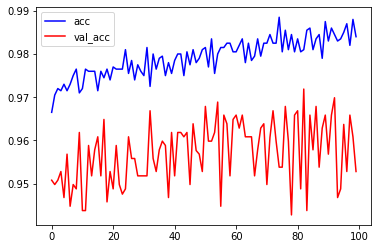

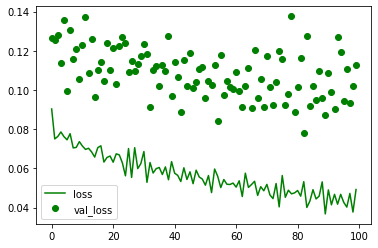

In [33]:
plt.figure()
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,'b',label='acc')
plt.plot(epochs,val_acc,'r',label='val_acc')
plt.legend()


plt.figure()
plt.plot(epochs,loss,'g',label='loss')
plt.plot(epochs,val_loss,'go',label='val_loss')
plt.legend()

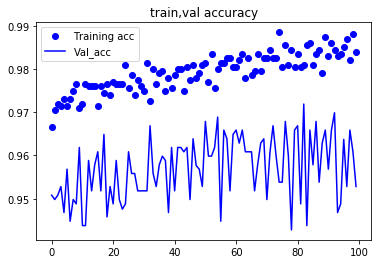

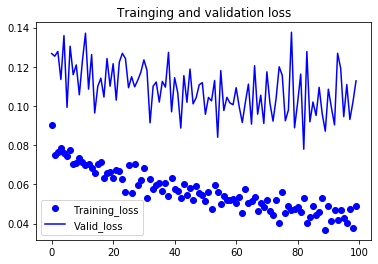

In [31]:
acc=history.history['acc']
val_acc=history.history['val_acc']



loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Val_acc')

plt.title('train,val accuracy')

plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='Valid_loss')

plt.title('Trainging and validation loss')
plt.legend()
plt.show()

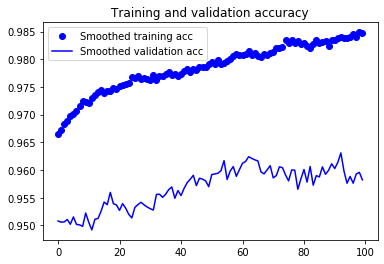

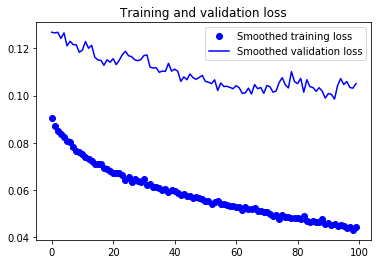

In [28]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [105]:
model.save('model_2.h5')